In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.io as sio
%matplotlib inline

In [95]:
raw_data = sio.loadmat('ex6data1.mat')

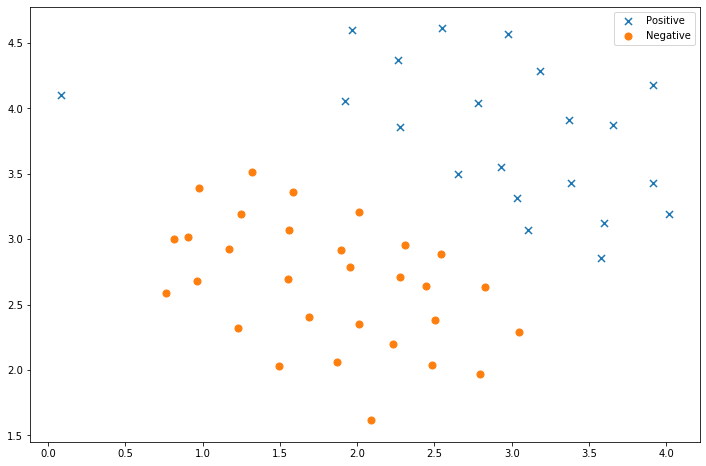

In [96]:
data = pd.DataFrame(raw_data['X'], columns=['X1', 'X2'])
data['y'] = raw_data['y']

positive = data[data['y'].isin([1])]
negative = data[data['y'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['X1'], positive['X2'], s=50, marker='x', label='Positive')
ax.scatter(negative['X1'], negative['X2'], s=50, marker='o', label='Negative')
ax.legend()

In [97]:
from sklearn import svm
svc0 = svm.SVC(kernel = "linear", C=1, max_iter=5000)
svc = svm.LinearSVC(C=1, loss='hinge', max_iter=5000)
svc

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=5000, multi_class='ovr',
          penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [98]:
svc0.fit(data[['X1', 'X2']], data['y'])
svc0.score(data[['X1', 'X2']], data['y'])

0.9803921568627451

In [99]:
svc.fit(data[['X1', 'X2']], data['y'])
svc.score(data[['X1', 'X2']], data['y'])

0.9803921568627451

In [100]:
svc2 = svm.LinearSVC(C=500, loss='hinge', max_iter=500000)
svc2.fit(data[['X1', 'X2']], data['y'])
svc2.score(data[['X1', 'X2']], data['y'])

1.0

In [101]:
W0=svc0.coef_[0]
I0=svc0.intercept_
a0 = -W0[0]/W0[1]
b0 = -I0[0]/W0[1]
W2=svc2.coef_[0]
I2=svc2.intercept_
a2 = -W2[0]/W2[1]
b2 = -I2[0]/W2[1]

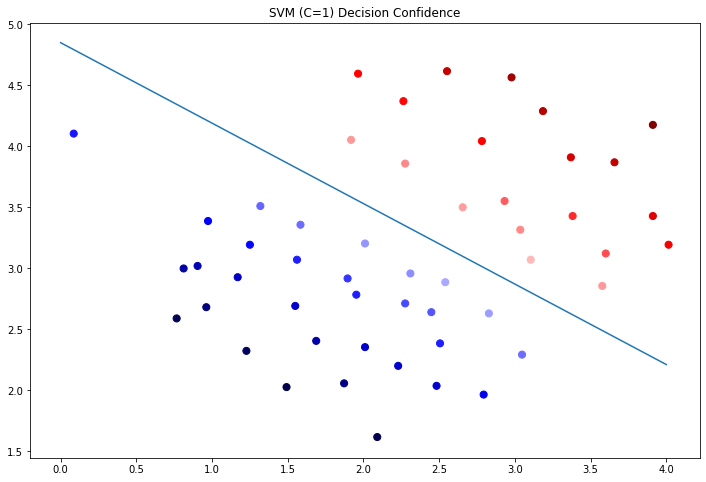

In [105]:
data['SVM 1 Confidence'] = svc.decision_function(data[['X1', 'X2']])
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(data['X1'], data['X2'], s=50, c=data['SVM 1 Confidence'], cmap='seismic')
ax.set_title('SVM (C=1) Decision Confidence')

xplt = np.array([0,4])
ax.plot(xplt, a0*xplt+b0, label = "Boundary")

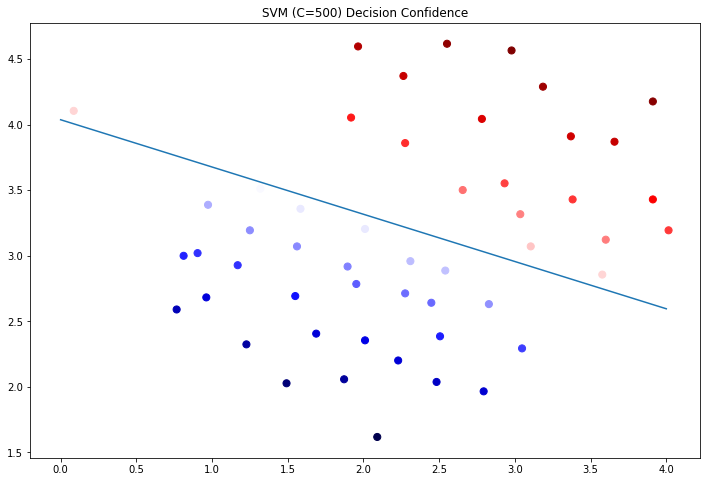

In [106]:
data['SVM 2 Confidence'] = svc2.decision_function(data[['X1', 'X2']])
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(data['X1'], data['X2'], s=50, c=data['SVM 2 Confidence'], cmap='seismic')
ax.set_title('SVM (C=500) Decision Confidence')

xplt = np.array([0,4])
ax.plot(xplt, a2*xplt+b2, label = "Boundary")

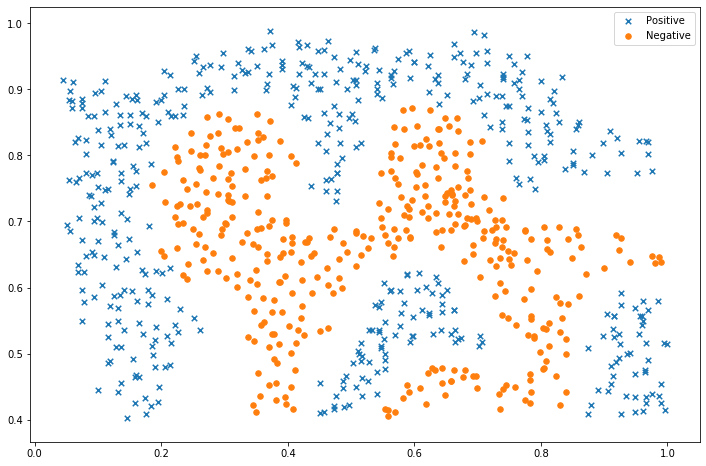

In [62]:
raw_data = loadmat('ex6data2.mat')

data = pd.DataFrame(raw_data['X'], columns=['X1', 'X2'])
data['y'] = raw_data['y']

positive = data[data['y'].isin([1])]
negative = data[data['y'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['X1'], positive['X2'], s=30, marker='x', label='Positive')
ax.scatter(negative['X1'], negative['X2'], s=30, marker='o', label='Negative')
ax.legend()

In [64]:
svcRBF = svm.SVC(kernel="rbf", C=100, gamma=10, probability=True)
svcPOL = svm.SVC(kernel="poly", C=100, gamma=10, probability=True)

In [65]:
svcRBF.fit(data[['X1', 'X2']], data['y'])
svcRBF.score(data[['X1', 'X2']], data['y'])

0.9698725376593279

In [66]:
svcPOL.fit(data[['X1', 'X2']], data['y'])
svcPOL.score(data[['X1', 'X2']], data['y'])

0.7137891077636153

In [75]:
data['ProbabilityRBF'] = svcRBF.predict_proba(data[['X1', 'X2']])[:,1]
data['ProbabilityPOL'] = svcPOL.predict_proba(data[['X1', 'X2']])[:,0]

In [117]:
svcRBF.predict(data[['X1', 'X2']])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=uint8)

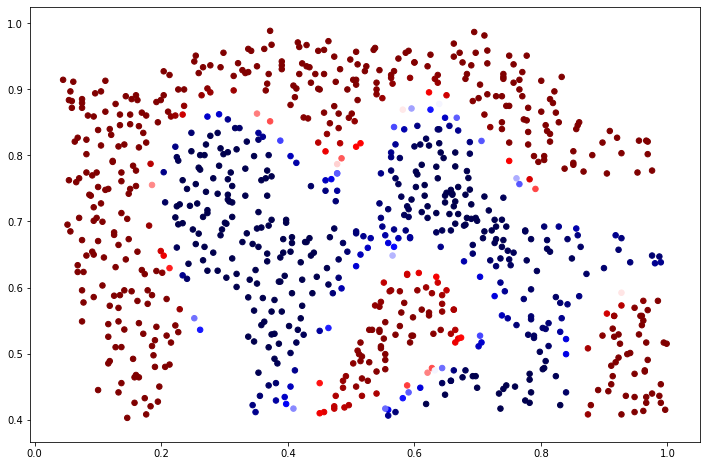

In [77]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(data['X1'], data['X2'], s=30, c=data['ProbabilityRBF'], cmap='seismic')

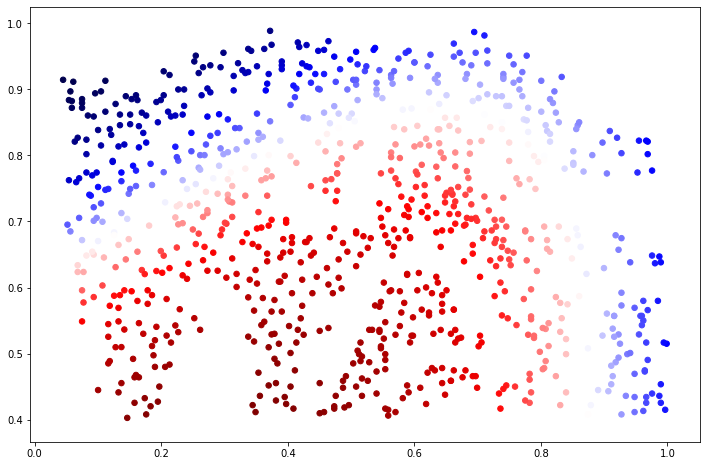

In [78]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(data['X1'], data['X2'], s=30, c=data['ProbabilityPOL'], cmap='seismic')

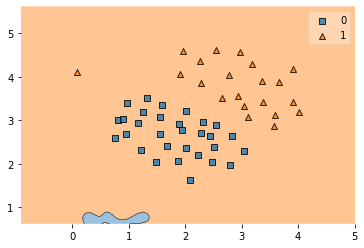

In [118]:
import mlxtend
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X=data[['X1', 'X2']].to_numpy(), y=data['y'].to_numpy(), clf=svcRBF, legend=1)